# 라이브러리 불러오기 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline

In [2]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 파일 불러오기

In [4]:
#토큰화 파일 by 은지
sd1 = pd.read_csv('./data_l/ssodam2021half+popularity_tokenized.csv')

In [5]:
sd1_tk = sd1['text_tokenized']
sd1_tk.head()

0    [('2021년', 'Number'), ('은', 'Foreign'), ('모두',...
1    [('모든', 'Noun'), ('일이', 'Modifier'), ('잘', 'Ve...
2    [('예비', 'Noun'), ('회계사', 'Noun'), ('나', 'Noun'...
3                                   [('1등', 'Number')]
4    [('언', 'Modifier'), ('제바', 'Noun'), ('껴', 'Ver...
Name: text_tokenized, dtype: object

# 전처리 

In [6]:
sd1.shape

(77980, 18)

In [7]:
sd1.columns

Index(['num', 'board', 'title', 'text', 'writer', 'upload_date', 'upload_time',
       'view', 'likes', 'dislikes', 'comments', 'comments_writer',
       'comments_cnt', 'popularity', 'text_tokenized', 'title_tokenized',
       'comments_tokenized', 'comments_writer_tokenized'],
      dtype='object')

In [8]:
sd1.isnull().sum()

num                              0
board                            0
title                           70
text                          3680
writer                           4
upload_date                      0
upload_time                      0
view                             0
likes                            0
dislikes                         0
comments                     12115
comments_writer              41754
comments_cnt                     0
popularity                       0
text_tokenized                3360
title_tokenized                 15
comments_tokenized           11983
comments_writer_tokenized    41638
dtype: int64

- 행의 값이 모두 null인 데이터는 이미 삭제됨

In [9]:
#title이 null인 데이터 확인
sd1[sd1.title.isnull()]

,num,board,title,text,writer,upload_date,upload_time,view,likes,dislikes,comments,comments_writer,comments_cnt,popularity,text_tokenized,title_tokenized,comments_tokenized,comments_writer_tokenized
2521,1086546,취업게시판,NaN,NaN,익명,2021/01/06,14:31,603.0,4.0,0.0,"정보처리기사, 증권사 어느 부서 가고 싶으세요, 프론트 가고싶으시다는 건가요, 데이...",NaN,6.0,0,[],[],"[('정보처리기사', 'Noun'), (',', 'Punctuation'), ('증...",NaN
2680,1086774,익게2,NaN,는 칼 융의 성격 유형 이론을 근거로 캐서린 브리그스와 그녀의 딸 이사벨 브리그...,익명,2021/01/06,20:36,2728.0,97.0,1.0,"추천 박고 갑니다 , 앗 나도 인프피, 안녕 나도, 인프피하이, 어 나도 인프피...",NaN,59.0,1,"[('는', 'Verb'), ('칼', 'Noun'), ('융', 'Noun'), ...",[],"[('추천', 'Noun'), ('박고', 'Verb'), ('갑니다', 'Verb...",NaN
2908,1087090,익게2,NaN,50세까지 전국에 재활치료센터 심리치료센터 10개 내는것이 목표,익명,2021/01/07,11:21,470.0,1.0,1.0,"저정도면 모든 직업에 다 어울린다는 말 아니냐지나가는 , 특 공감하기도 전에 객관적...","읽으면서 그생각함 ㅋㅋㅋ 저기에 없는직업 찾는게 더 어렵겠다, ㄹㅇ, ㅎㅇㄹ, 청렴...",11.0,0,"[('50', 'Number'), ('세', 'Noun'), ('까지', 'Josa...",[],"[('저', 'Determiner'), ('정도', 'Noun'), ('면', 'J...","[('읽으면서', 'Verb'), ('그', 'Determiner'), ('생각',..."
3603,1088085,익게2,NaN,다미의 복수형,익명,2021/01/09,00:26,81.0,1.0,1.0,"의 단수형도 라는데 알고있었어, 댐잇, 가 복수형이고 단수형이 임",오우 아이 칸트 빌리빗잇,4.0,0,"[('다미', 'Noun'), ('의', 'Josa'), ('복수형', 'Noun')]",[],"[('의', 'Noun'), ('단', 'Modifier'), ('수형도', 'No...","[('오우', 'Noun'), ('아이', 'Noun'), ('칸트', 'Noun'..."
5281,1090630,익게2,NaN,"스위트홈 송강, 서강이랑 비슷하네 ㅋㅋㄱ",익명,2021/01/13,13:52,44.0,0.0,0.0,NaN,NaN,0.0,0,"[('스위트홈', 'Noun'), ('송강', 'Noun'), (',', 'Punc...",[],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70527,1189076,주식/투자,NaN,,익명,2021/06/16,21:01,205.0,2.0,1.0,NaN,NaN,0.0,0,[],[],NaN,NaN
70672,1189270,익게2,NaN,좋은 이벤트 감사해요,익명,2021/06/16,23:56,338.0,9.0,0.0,헐 뭔가 느낌있다,고마웡 ㅎㅎ,2.0,0,"[('좋은', 'Adjective'), ('이벤트', 'Noun'), ('감사해요'...",[],"[('헐', 'Verb'), ('뭔가', 'Noun'), ('느낌있다', 'Verb')]","[('고마', 'Noun'), ('웡', 'Noun'), ('ㅎㅎ', 'Korean..."
74038,1194212,익게2,NaN,NaN,익명,2021/06/22,21:17,543.0,20.0,2.0,"위로추, 개추크레용, ㅠㅠ, 3백만원짜리 인기글 가자, 학부생, ㅠㅠ존버, 아 코인...","너무 값비쌉니다, ㅖ",10.0,0,NaN,[],"[('위로', 'Noun'), ('추', 'Noun'), (',', 'Punctua...","[('너무', 'Adverb'), ('값', 'Noun'), ('비쌉니다', 'Ad..."
74853,1195438,익게2,NaN,시험성적 0점 받음 수업 다...,익명,2021/06/24,15:17,399.0,19.0,0.0,"확인 필수다, 학점은 영원히 남는다","ㅠㅠㅠㅠ줌으로 확인하는거라 더 무섭다ㅠㅠㅠㅠㅠ, 오키용기내볼게ㅠㅠㅠ",4.0,0,"[('시험', 'Noun'), ('성적', 'Noun'), ('0', 'Number...",[],"[('확인', 'Noun'), ('필수', 'Noun'), ('다', 'Josa')...","[('ㅠㅠㅠㅠ', 'KoreanParticle'), ('줌', 'Noun'), ('..."


- title null값은 작성자가 글 내용을 삭제한 경우
- text가 null값은 __본문에 사진만 업로드한 경우 or 글 내용을 삭제한 경우__
- writer null값은 정상적인 글인 것 같으나, 작성자가 탈퇴하여 writer가 null이 된 가능성이 커보임
- comments null값은 댓글이 안 달린 경우

# 인기글 분석

In [10]:
print(sd1.popularity.value_counts())
print('전체글 대비 인기글 비율: {}%'.format(len(sd1[sd1.popularity==1])/len(sd1)*100))

0    72094
1     5886
Name: popularity, dtype: int64
전체글 대비 인기글 비율: 7.548089253654783%


- 서담 어워즈 2020의 경우 전체글 대비 인기글 개수: 7.496343927570694% 였음
- 대부분 인기글은 상위 7.5% 정도라는 결론!

In [11]:
sd_popular = sd1[sd1.popularity==1]
sd_unpopular = sd1[sd1.popularity==0]

## board

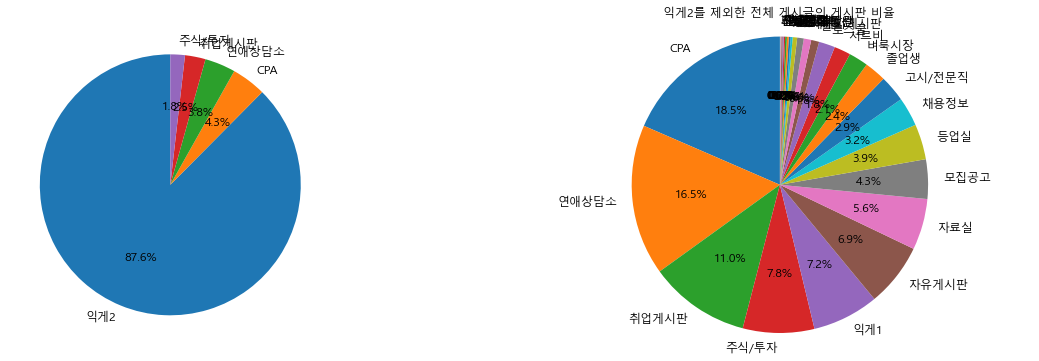

In [12]:
f, ax = plt.subplots(1,2,figsize=(20,6))
ax[0].pie(sd1.board.value_counts()[:5],
         labels=sd1.board.value_counts()[:5].index,
         autopct='%1.1f%%',
         startangle=90,
         textprops={'fontsize':12})
ax[1].pie(sd1.board.value_counts()[1:],
labels = sd1.board.value_counts()[1:].index,
autopct='%1.1f%%',
startangle=90,
textprops={'fontsize': 12})
ax[1].axis('equal')
ax[1].set_title('익게2를 제외한 전체 게시글의 게시판 비율')

plt.show()

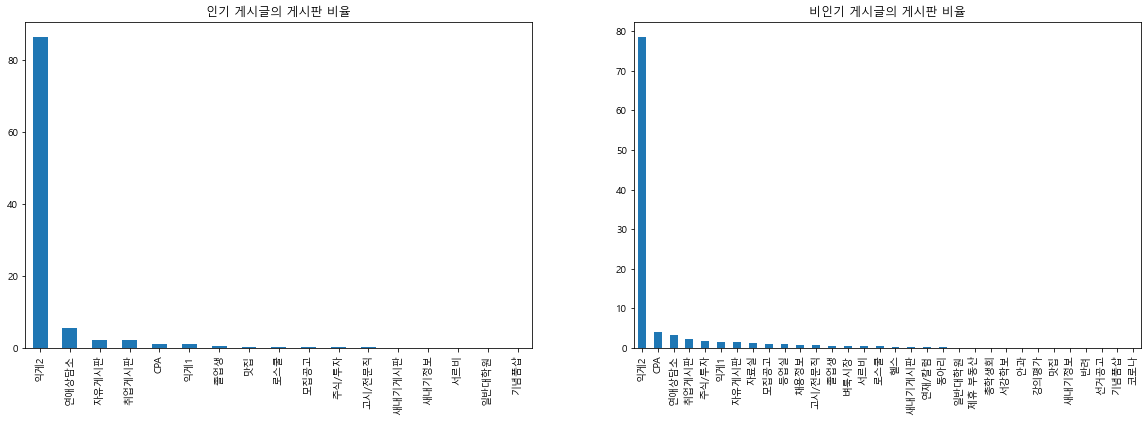

In [13]:
f, ax = plt.subplots(1,2,figsize=(20,6))
(sd_popular.board.value_counts()/len(sd_popular)*100).plot(kind = 'bar', title='인기 게시글의 게시판 비율', ax = ax[0])
(sd_unpopular.board.value_counts()/len(sd_unpopular)*100).plot(kind = 'bar', title='비인기 게시글의 게시판 비율', ax = ax[1])
plt.show()

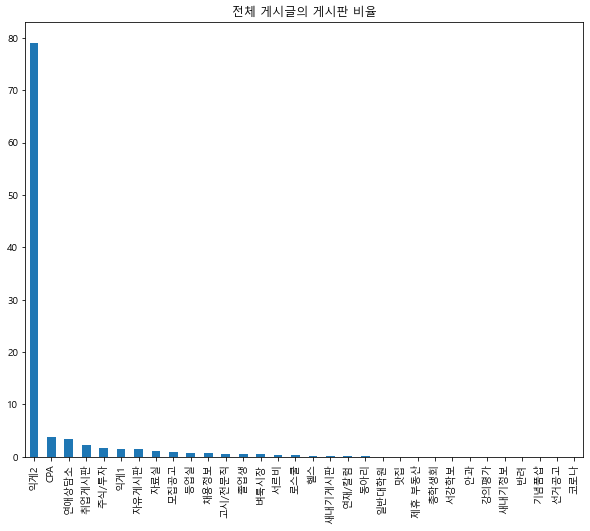

In [18]:
plt.figure(figsize=(10,8))
(sd1.board.value_counts()/len(sd1)*100).plot(kind='bar',title='전체 게시글의 게시판 비율')
plt.show()

# TOP 3 

In [15]:
sd1.head()

,num,board,title,text,writer,upload_date,upload_time,view,likes,dislikes,comments,comments_writer,comments_cnt,text_tokenized,title_tokenized,comments_tokenized,comments_writer_tokenized
0,1082901,익게2,해피뉴이어,2021년은 모두 행복한 한해가 되길,익명,2021/01/01,00:00,1343.0,195.0,0.0,"앗, 성지다, 첫글 ㅊㅊ, 추천 준다, 내 24살은 인생에서 가장 빛나는 날로 만들...",NaN,20.0,"[('2021년', 'Number'), ('은', 'Foreign'), ('모두',...","[('해피뉴이어', 'Noun')]","[('앗', 'Noun'), (',', 'Punctuation'), ('성지', '...",NaN
1,1082902,익게2,2021년 새해복 많이받으세요,모든 일이 잘 되기를 12시 땡,익명,2021/01/01,00:00,107.0,3.0,0.0,늦었네,"2빠다 ㅎㅎ, 내년에 도전한다",3.0,"[('모든', 'Noun'), ('일이', 'Modifier'), ('잘', 'Ve...","[('2021년', 'Number'), ('새해', 'Noun'), ('복', 'N...","[('늦었네', 'Verb')]","[('2', 'Number'), ('빠다', 'Noun'), ('ㅎㅎ', 'Kore..."
2,1082903,익게2,첫글은 내꼬,예비회계사 나다미,익명,2021/01/01,00:00,139.0,1.0,0.0,"ㄹㅇ 1등이네 ㅋㅋ, 실패",ㅜㅜ,3.0,"[('예비', 'Noun'), ('회계사', 'Noun'), ('나', 'Noun'...","[('첫', 'Modifier'), ('글', 'Noun'), ('은', 'Josa...","[('ㄹㅇ', 'KoreanParticle'), ('1등', 'Number'), (...","[('ㅜㅜ', 'KoreanParticle')]"
3,1082905,익게2,땡ㅎㅎㅎㅎㅎㅎㅎ,1등,익명,2021/01/01,00:00,39.0,0.0,0.0,NaN,NaN,0.0,"[('1등', 'Number')]","[('땡', 'Noun'), ('ㅎㅎㅎㅎㅎㅎㅎ', 'KoreanParticle')]",NaN,NaN
4,1082906,익게2,어디 카운트 다운 하는 곳 없냐,언제바껴,익명,2021/01/01,00:00,84.0,0.0,0.0,232번 불교방송,NaN,1.0,"[('언', 'Modifier'), ('제바', 'Noun'), ('껴', 'Ver...","[('어디', 'Noun'), ('카운트', 'Noun'), ('다운', 'Noun...","[('232', 'Number'), ('번', 'Noun'), ('불교', 'Nou...",NaN


In [21]:
sd1.board.value_counts().sort_values(ascending=True)

코로나           2
선거공고          2
기념품샵          3
반려            4
새내기정보        15
안과           21
강의평가         21
서강학보         25
총학생회         30
제휴 부동산       33
맛집           34
일반대학원        35
동아리          79
연재/칼럼       117
새내기게시판      132
헬스          142
로스쿨         288
서르비         293
벼룩시장        344
졸업생         387
고시/전문직      471
채용정보        515
등업실         629
모집공고        701
자료실         908
자유게시판      1122
익게1        1181
주식/투자      1269
취업게시판      1795
연애상담소      2681
CPA        3012
익게2       61689
Name: board, dtype: int64

- 코로나, 선거공고, 반려는 있었다가 숨겨진 게시판으로 추정
- (몰랐던 게시판이 많네요 ㅎㅅㅎ)

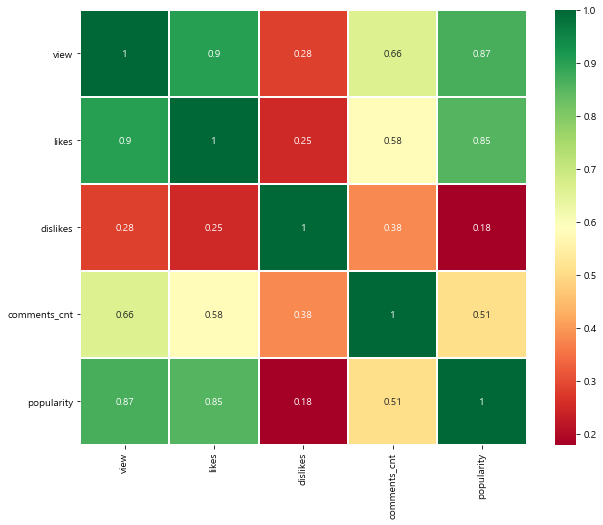

In [19]:
# correlation heatmap
sns.heatmap(sd1[['view','likes','dislikes','comments_cnt','popularity']].corr(), annot = True, cmap = 'RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

## 조회수 

In [20]:
sd1.columns

Index(['num', 'board', 'title', 'text', 'writer', 'upload_date', 'upload_time',
       'view', 'likes', 'dislikes', 'comments', 'comments_writer',
       'comments_cnt', 'popularity', 'text_tokenized', 'title_tokenized',
       'comments_tokenized', 'comments_writer_tokenized'],
      dtype='object')

In [21]:
sd1.sort_values(by=['view'], ascending=False)

,num,board,title,text,writer,upload_date,upload_time,view,likes,dislikes,comments,comments_writer,comments_cnt,popularity,text_tokenized,title_tokenized,comments_tokenized,comments_writer_tokenized
9187,1096419,익게2,70프로 박선배님 30프로 박선배님 뽑기,70프로 박선배님 30프로 확률로 은빈센빠이 70프로 박선...,익명,2021/01/23,15:30,19456.0,85.0,3.0,"보안 확실하네, 글쓴이도 쫌치네, 야 이거 신기허네, 와 뭐야, 정답 7이 박은빈 ...","ㅋㅋ 심심해서 해봤는데 진이뽀가 잘 막아놨넼ㅋㅋㅋ, 될떄도 있고 안될떄도 있고, ㅋ...",79.0,1,"[('70', 'Number'), ('프로', 'Noun'), ('박', 'Noun...","[('70', 'Number'), ('프로', 'Noun'), ('박', 'Noun...","[('보안', 'Noun'), ('확실하네', 'Adjective'), (',', ...","[('ㅋㅋ', 'KoreanParticle'), ('심심해서', 'Adjective..."
15531,1105759,연애상담소,튤립 우리 학교 매치 오픈 이벤트,2016년부터 서담과 제휴를 맺고 있는 튤립의 이벤트 글입니다 튤립은나만의 기준 5...,익명,2021/02/09,02:24,11070.0,14.0,0.0,"2021년 소원 코로나 어서 끝나고 좋은 사람 만나면 좋겠어요, 앱에서 메일인증하...","1, 2 완료하시고 구글폼 작성해주시면 이벤트 참여 완료입니다 스타벅스 기프티콘은...",51.0,0,"[('2016년', 'Number'), ('부터', 'Foreign'), ('서',...","[('튤립', 'Noun'), ('우리', 'Noun'), ('학교', 'Noun'...","[('2021년', 'Number'), ('소원', 'Noun'), ('코로나', ...","[('1', 'Number'), (',', 'Punctuation'), ('2', ..."
67716,1185004,익게2,내 스스로의 급을 높이는 데 채찍질되는 두 핫게글 ㄷㄷ,내가 좋아해달라고 한적도없는데헬스 자극 짤 링크 누르면 해당 글로 이동됨,익명,2021/06/11,16:43,10198.0,3.0,1.0,NaN,NaN,0.0,0,"[('내', 'Noun'), ('가', 'Josa'), ('좋아해', 'Adject...","[('내', 'Noun'), ('스스로', 'Noun'), ('의', 'Josa')...",NaN,NaN
53278,1162849,익게2,여자친구가 회계사셤 떨어지면 헤어지재,장난인가ㅠㅠ 두달후 시험인데 목숨걸고 붙고싶다 ...,익명,2021/05/06,01:21,8995.0,148.0,45.0,"ㄷㄷㄷㄷ, 동기부여 시켜주려고 그런 말 했다고 믿고싶다, 동기부여라도 하면 안되는 ...","이십중후, 여자친구 스펙이 좋아서 떨어지면 너무 차이나긴한거갗기도해, 수험생때 만나...",178.0,1,"[('장난', 'Noun'), ('인가', 'Josa'), ('ㅠㅠ', 'Korea...","[('여자친구', 'Noun'), ('가', 'Josa'), ('회계사', 'Nou...","[('ㄷㄷㄷㄷ', 'KoreanParticle'), (',', 'Punctuatio...","[('이십', 'Modifier'), ('중후', 'Noun'), (',', 'Pu..."
33128,1131272,익게2,오늘자 법기봉 정리,1 한 학우분 캠에 여친분 등장 ...,익명,2021/03/19,11:59,8039.0,254.0,3.0,"ㅗㅜㅑ, 4번은 처음 알았는데 진짜개념없다, 여친 카메라에 대고 브이함 ㅋㅋㅋㅋ...",NaN,82.0,1,"[('1', 'Number'), ('한', 'Verb'), ('학우', 'Noun'...","[('오늘', 'Noun'), ('자', 'Suffix'), ('법기', 'Noun...","[('ㅗㅜㅑ', 'KoreanParticle'), (',', 'Punctuation...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46973,1153278,등업실,김종호 교수님 동남아전통사회의이해 21년 1학기 중간고사,NaN,앵,2021/04/21,18:10,6.0,0.0,0.0,NaN,NaN,0.0,0,NaN,"[('김종호', 'Noun'), ('교수', 'Noun'), ('님', 'Suffi...",NaN,NaN
70650,1189240,익게2,꺄아아아아악,내가 미쳤나봐 자기전에 배고프다고 엄청 먹어버렸어 ㅠ,익명,2021/06/16,23:47,6.0,0.0,0.0,NaN,NaN,0.0,0,"[('내', 'Noun'), ('가', 'Josa'), ('미쳤나', 'Adject...","[('꺄', 'Noun'), ('아아', 'Exclamation'), ('아아', ...",NaN,NaN
23043,1116542,채용정보,하이이엔지 환경 수질분석 정규직 신입 채용 0301,하이이엔지 환경 수질분석 정규직 신입 채용 0301채용공고 바로가기 42이미지 클릭,잡코리아,2021/02/26,13:49,5.0,0.0,0.0,NaN,NaN,0.0,0,"[('하이', 'Noun'), ('이', 'Suffix'), ('엔', 'Josa'...","[('하이', 'Noun'), ('이', 'Suffix'), ('엔', 'Josa'...",NaN,NaN
24997,1119357,익게2,일반선택도 필수이수학점이 정해져 있어,총 이수 학점 상으로는 전공선택으로만 채워도 충분한데일반선택 부족학점이 따로 있다고...,익명,2021/03/02,12:03,5.0,0.0,0.0,NaN,NaN,0.0,0,"[('총', 'Noun'), ('이수', 'Noun'), ('학점', 'Noun')...","[('일', 'Modifier'), ('반', 'Modifier'), ('선택', ...",NaN,NaN


### top3 

In [22]:
sd1.sort_values(by=['view'], ascending=False)[:10]

,num,board,title,text,writer,upload_date,upload_time,view,likes,dislikes,comments,comments_writer,comments_cnt,popularity,text_tokenized,title_tokenized,comments_tokenized,comments_writer_tokenized
9187,1096419,익게2,70프로 박선배님 30프로 박선배님 뽑기,70프로 박선배님 30프로 확률로 은빈센빠이 70프로 박선...,익명,2021/01/23,15:30,19456.0,85.0,3.0,"보안 확실하네, 글쓴이도 쫌치네, 야 이거 신기허네, 와 뭐야, 정답 7이 박은빈 ...","ㅋㅋ 심심해서 해봤는데 진이뽀가 잘 막아놨넼ㅋㅋㅋ, 될떄도 있고 안될떄도 있고, ㅋ...",79.0,1,"[('70', 'Number'), ('프로', 'Noun'), ('박', 'Noun...","[('70', 'Number'), ('프로', 'Noun'), ('박', 'Noun...","[('보안', 'Noun'), ('확실하네', 'Adjective'), (',', ...","[('ㅋㅋ', 'KoreanParticle'), ('심심해서', 'Adjective..."
15531,1105759,연애상담소,튤립 우리 학교 매치 오픈 이벤트,2016년부터 서담과 제휴를 맺고 있는 튤립의 이벤트 글입니다 튤립은나만의 기준 5...,익명,2021/02/09,02:24,11070.0,14.0,0.0,"2021년 소원 코로나 어서 끝나고 좋은 사람 만나면 좋겠어요, 앱에서 메일인증하...","1, 2 완료하시고 구글폼 작성해주시면 이벤트 참여 완료입니다 스타벅스 기프티콘은...",51.0,0,"[('2016년', 'Number'), ('부터', 'Foreign'), ('서',...","[('튤립', 'Noun'), ('우리', 'Noun'), ('학교', 'Noun'...","[('2021년', 'Number'), ('소원', 'Noun'), ('코로나', ...","[('1', 'Number'), (',', 'Punctuation'), ('2', ..."
67716,1185004,익게2,내 스스로의 급을 높이는 데 채찍질되는 두 핫게글 ㄷㄷ,내가 좋아해달라고 한적도없는데헬스 자극 짤 링크 누르면 해당 글로 이동됨,익명,2021/06/11,16:43,10198.0,3.0,1.0,NaN,NaN,0.0,0,"[('내', 'Noun'), ('가', 'Josa'), ('좋아해', 'Adject...","[('내', 'Noun'), ('스스로', 'Noun'), ('의', 'Josa')...",NaN,NaN
53278,1162849,익게2,여자친구가 회계사셤 떨어지면 헤어지재,장난인가ㅠㅠ 두달후 시험인데 목숨걸고 붙고싶다 ...,익명,2021/05/06,01:21,8995.0,148.0,45.0,"ㄷㄷㄷㄷ, 동기부여 시켜주려고 그런 말 했다고 믿고싶다, 동기부여라도 하면 안되는 ...","이십중후, 여자친구 스펙이 좋아서 떨어지면 너무 차이나긴한거갗기도해, 수험생때 만나...",178.0,1,"[('장난', 'Noun'), ('인가', 'Josa'), ('ㅠㅠ', 'Korea...","[('여자친구', 'Noun'), ('가', 'Josa'), ('회계사', 'Nou...","[('ㄷㄷㄷㄷ', 'KoreanParticle'), (',', 'Punctuatio...","[('이십', 'Modifier'), ('중후', 'Noun'), (',', 'Pu..."
33128,1131272,익게2,오늘자 법기봉 정리,1 한 학우분 캠에 여친분 등장 ...,익명,2021/03/19,11:59,8039.0,254.0,3.0,"ㅗㅜㅑ, 4번은 처음 알았는데 진짜개념없다, 여친 카메라에 대고 브이함 ㅋㅋㅋㅋ...",NaN,82.0,1,"[('1', 'Number'), ('한', 'Verb'), ('학우', 'Noun'...","[('오늘', 'Noun'), ('자', 'Suffix'), ('법기', 'Noun...","[('ㅗㅜㅑ', 'KoreanParticle'), (',', 'Punctuation...",NaN
57251,1168788,익게2,현 시점 91년생,부모님의 26살31살 과 비교때마침 운영자씨도 31살이네ㅋㅋ,익명,2021/05/16,21:42,7684.0,177.0,0.0,"평균 수명이 늘어나면서, 발달 시기가 늦춰진다는 연구 결과가 있대 정신과 교수님덜 ...",NaN,31.0,1,"[('부모님', 'Noun'), ('의', 'Josa'), ('26', 'Numbe...","[('현', 'Noun'), ('시점', 'Noun'), ('91년', 'Numbe...","[('평균', 'Noun'), ('수명', 'Noun'), ('이', 'Josa')...",NaN
53965,1163913,익게2,합격자 명단,축하드립니다,익명,2021/05/07,21:57,7634.0,267.0,15.0,"작년 시험 발표가 이번에 난거, 16이 젤 막내시네 씨파위엄, 축하드립니다, 나랑 ...",ㅇㅇ 2020 합격자 명단이 이제서야 붙음,53.0,1,"[('축하', 'Noun'), ('드립니다', 'Verb')]","[('합격자', 'Noun'), ('명단', 'Noun')]","[('작년', 'Noun'), ('시험', 'Noun'), ('발표', 'Noun'...","[('ㅇㅇ', 'KoreanParticle'), ('2020', 'Number'),..."
15402,1105573,익게2,20대 서울시 공무원 극단적 선택,다소 이른 나이에 공무원 시험에 합격한 씨는직장 내 괴롭힘으로힘들어했던것으로 전해졌...,익명,2021/02/08,21:44,7539.0,127.0,2.0,"직장 내 괴롭힘 화난다, 혹시 그 유퀴즈에 나온 분 아니야, 헉 나도 그생각중 ㅠㅠ...",NaN,40.0,1,"[('다소', 'Noun'), ('이른', 'Verb'), ('나이', 'Noun'...","[('20', 'Number'), ('대', 'Verb'), ('서울시', 'Nou...","[('직장', 'Noun'), ('내', 'Noun'), ('괴롭힘', 'Noun'...",NaN
30455,1127287,익게2,허세남 유노윤호의 진면목,가 방금 보도했네며칠전 영업제한 어기고 술 먹었다고 했을때유노윤호 쉴드글이 가득했던...,익명,2021/03/12,20:30,7342.0,195.0,9.0,"도주윤호 , 경찰발 도주 몸싸움은 거짓뉴스랍니다 유노윤호 적발된 장소는 유흥주점...",예약제로만 운영되는 유흥주점에서 친구3명여종업원이랑 늦게까지 술마심경찰 들이닥치니 ...,184.0,1,"[('가', 'Verb'), ('방금', 'Noun'), ('보도', 'Noun')...","[('허세', 'Noun'), ('남', 'Noun'), ('유노윤호', 'Noun...","[('도주', 'Noun'), ('윤호', 'Noun'), (',', 'Punctu...","[('예', 'Modifier'), ('약', 'Modifier'), ('제로', ..."
65552,1181528,익게2,알바 중 진상 온 인기글 왠지 우리집 얘긴 거 같다일부 수정,"본문 수정됨 당사자인지 확실치도 않은데 괜히 사과한다고 나댄 게 머저리 같고, 사람...",익명,2021/06/07,02:45,7320.0,118.0,23.0,"너가 힘들겠다, 저런그 글쓴이도 참 안타깝지만 너도 자녀 입장에서 되게 힘들겠네 ㅠ...",나는 방구석 휴학 겜돌이 백수라 힘들건 없고 힘든건 일하거나 공부하는 사람들이지 마...,107.0,1,"[('본문', 'Noun'), ('수정', 'Noun'), ('됨', 'Verb')...","[('알바', 'Noun'), ('중', 'Noun'), ('진상', 'Noun')...","[('너', 'Noun'), ('가', 'Josa'), ('힘들겠다', 'Adjec...","[('나', 'Noun'), ('는', 'Josa'), ('방', 'Noun'), ..."


In [23]:
sd1[sd1['board']=='CPA']

,num,board,title,text,writer,upload_date,upload_time,view,likes,dislikes,comments,comments_writer,comments_cnt,popularity,text_tokenized,title_tokenized,comments_tokenized,comments_writer_tokenized
36,1082948,CPA,보통 이맘때쯤 감 오나요,회세잼경경상 뭐 하나 전략 과목 없는 것 같은 초시생인데요보통 이 쯤이면 합격 각 ...,익명,2021/01/01,00:24,311.0,2.0,0.0,전 2주전쯤에야 반반 느낌 왔었어요,NaN,1.0,0,"[('회', 'Noun'), ('세', 'Modifier'), ('잼', 'Noun...","[('보통', 'Noun'), ('이맘때', 'Adverb'), ('쯤', 'Nou...","[('전', 'Noun'), ('2', 'Number'), ('주전', 'Noun'...",NaN
47,1082961,CPA,1차합1차합1차합,2차까지 쭈우우욱 ㅠ 모두 화이팅하세요 ...,익명,2021/01/01,00:31,175.0,5.0,0.0,NaN,NaN,0.0,0,"[('2', 'Number'), ('차', 'Noun'), ('까지', 'Josa'...","[('1', 'Number'), ('차합', 'Noun'), ('1', 'Numbe...",NaN,NaN
55,1082970,CPA,아직 객 1회독 못한 과목 있으면 힘든걸까요,경경상 못햇어용ㅠㅜ경제는 거의 다 했구 경영상법은 이제 시작인뎅딴건 2회독 중이에요...,익명,2021/01/01,00:39,604.0,2.0,0.0,"이제시작이면 빨리하세요, 그렇다고 뭐 방법은 없으니그냥 암 생각 안 하고 하러구요ㅠ...","ㅠㅠㅠㅠㅠㅠㅠ 괜찮겠죠ㅠㅠㅠㅠ 흐어엉, ㅜㅠㅠㅠㅠ 맞아용, 따뜻한 말 감사합니당 우...",15.0,0,"[('경', 'Modifier'), ('경상', 'Noun'), ('못햇', 'No...","[('아직', 'Adverb'), ('객', 'Noun'), ('1회', 'Numb...","[('이', 'Determiner'), ('제', 'Modifier'), ('시작'...","[('ㅠㅠㅠㅠㅠㅠㅠ', 'KoreanParticle'), ('괜찮겠죠', 'Adje..."
125,1083068,CPA,잠잘때 허리가 빳빳하게 굳는느낌 아시는분,평상 시엔 괜찮은데 잠잘때만 허리 가운데가 붕 뜨고 굳는느낌이에요 ㅠㅠ 잠에 들때는...,익명,2021/01/01,07:19,259.0,1.0,0.0,"허리 뜨는 부분에 수건 깔고 자요, 그거 저도 그런데 옆으로 자보세용, 강직성척추염...",NaN,3.0,0,"[('평상', 'Noun'), ('시엔', 'Noun'), ('괜찮은데', 'Adj...","[('잠잘', 'Verb'), ('때', 'Noun'), ('허리', 'Noun')...","[('허리', 'Noun'), ('뜨는', 'Verb'), ('부분', 'Noun'...",NaN
126,1083069,CPA,어제랑 똑같은 하루인데 엄청 긴장되네요,ㅋㅋ 어제 괜히 떨려서 잠도 못 잤습니다하 무섭지만 다들 파이팅이요 두달 마무리 잘...,익명,2021/01/01,07:20,258.0,4.0,0.0,NaN,NaN,0.0,0,"[('ㅋㅋ', 'KoreanParticle'), ('어제', 'Noun'), ('괜...","[('어제', 'Noun'), ('랑', 'Josa'), ('똑같은', 'Adjec...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77917,1200186,CPA,"정우승 워크북2021 1,2 판매",2021 정우승 세법워크북 판매합니다1권 법인세는 익금파트까지 형광펜과 필기있고2권...,익명,2021/06/30,21:31,59.0,0.0,0.0,몇 쇄 인가요,2쇄 입니다,2.0,0,"[('2021', 'Number'), ('정', 'Noun'), ('우승', 'No...","[('정', 'Noun'), ('우승', 'Noun'), ('워', 'Noun'),...","[('몇', 'Noun'), ('쇄', 'Noun'), ('인가요', 'Josa')]","[('2', 'Number'), ('쇄', 'Noun'), ('입니다', 'Adje..."
77919,1200188,CPA,강경태 세법 개론 자투리 구합니다,4일정도 필요합니다가격 제시 부탁드려요오카 링크입니다7 ...,익명,2021/06/30,21:32,41.0,0.0,0.0,NaN,구했습니다,1.0,0,"[('4일', 'Number'), ('정도', 'Foreign'), ('필요합니다'...","[('강경', 'Noun'), ('태', 'Noun'), ('세법', 'Noun')...",NaN,"[('구', 'Noun'), ('했습니다', 'Verb')]"
77927,1200208,CPA,제가 매우 한심해요ㅠㅠ징징글입니다ㅠ,22초시생인데날씨 때문인건지 지칠 타이밍인건지1월부터 집근처 스카다니면서 한번도 지...,익명,2021/06/30,21:51,764.0,11.0,0.0,여름엔 지치는게 국룰 아닌가요 ㅎㅎ 더위에 무리하지 마시고 날이 선선해지면 다시 빡...,NaN,5.0,0,"[('22초', 'Number'), ('시생인데날씨', 'Foreign'), ('때...","[('제', 'Noun'), ('가', 'Josa'), ('매우', 'Noun'),...","[('여름', 'Noun'), ('엔', 'Josa'), ('지치는게', 'Verb...",NaN
77935,1200220,CPA,기타세법 개론강의연습서 강의 뭐로 들어야 할까요,개론 강의는 21 업데이트가 안된것 같아서 일단 퇴양 연습서 공개강의로 듣고 있는데...,익명,2021/06/30,22:07,299.0,1.0,0.0,"개론 강의 이제 업뎃될 시기 아닌가요 개론꺼 기다렸다 들으세요, 오 저도 되게 궁금...",연습서 강의는 말문제 설명이 좀 부족한것 같더라구요 ㅠㅠ 개론 강의는 너무 과투입인...,9.0,0,"[('개론', 'Noun'), ('강의', 'Noun'), ('는', 'Josa')...","[('기타', 'Noun'), ('세법', 'Noun'), ('개론', 'Noun'...","[('개론', 'Noun'), ('강의', 'Noun'), ('이제', 'Noun'...","[('연습', 'Noun'), ('서', 'Josa'), ('강의', 'Noun')..."


## 댓글수 

In [24]:
sd1.sort_values(by=['comments_cnt'], ascending=False)[:10]

,num,board,title,text,writer,upload_date,upload_time,view,likes,dislikes,comments,comments_writer,comments_cnt,popularity,text_tokenized,title_tokenized,comments_tokenized,comments_writer_tokenized
14246,1103928,익게2,치킨 피자 샀는데 욕먹은 후임,진짜 개폐급이네,익명,2021/02/05,23:27,5620.0,180.0,20.0,"군대가 워낙 그런 분위기긴 하지만 저 사람이 뭐 잘못했다고 볼 건가, 선임 입장도 ...",NaN,254.0,1,"[('진짜', 'Noun'), ('개폐', 'Noun'), ('급', 'Suffix...","[('치킨', 'Noun'), ('피자', 'Noun'), ('샀는데', 'Verb...","[('군대', 'Noun'), ('가', 'Josa'), ('워낙', 'Noun')...",NaN
62161,1176330,익게2,저는 서담의 현자입니다 무물,모든 문제에 대한 해답을 알려드립니다삶 사랑 우정에 대한 고민부터우주의 삼라만상에 ...,익명,2021/05/29,21:22,3276.0,101.0,0.0,"왜 저는 썸남에게 차인걸까요, 그냥 마음이 식었어요, 잘해줬는데 의무적으로 한 느낑...","썸남이 익1님을 담기엔 너무 작다고 생각했나봅니다, 천천히 감정을 식히면서 만나길 ...",248.0,1,"[('모든', 'Noun'), ('문제', 'Noun'), ('에', 'Josa')...","[('저', 'Noun'), ('는', 'Josa'), ('서', 'Modifier...","[('왜', 'Noun'), ('저', 'Noun'), ('는', 'Josa'), ...","[('썸남', 'Noun'), ('이', 'Josa'), ('익', 'Noun'),..."
76608,1198163,익게2,지하철 소변테러남 극단적 선택,에효 참 그러게 그렇게 후회할 일을 그러게 왜 저질러가지고는,익명,2021/06/28,13:58,6904.0,126.0,13.0,2021년 6월 23일 오후 10시쯤 인천 2호선 주안역 에스컬레이터에서 20대 후...,NaN,246.0,1,"[('에', 'Josa'), ('효', 'Noun'), ('참', 'Verb'), ...","[('지하철', 'Noun'), ('소변', 'Noun'), ('테러', 'Noun...","[('2021년', 'Number'), ('6월', 'Number'), ('23일'...",NaN
75399,1196280,익게2,다미들 나는 고학번 할미야,인기글에 떠서 놀랬소계속 내 글만 새로고침해서 댓글 달다가 뒤로가기를 눌러버려서여기...,익명,2021/06/25,17:41,4660.0,263.0,18.0,"오래오래 사셔요 할매, 소개팅 받으소, 걍 친구들이랑 술마실수도 있지 그런거 상상하...","아이고 마음도 예쁘네 후배다미, 맞아 피곤혀그래서 할미 주름이 자꾸 는다 늘어, 어...",228.0,1,"[('인기', 'Noun'), ('글', 'Noun'), ('에', 'Josa'),...","[('다미', 'Noun'), ('들', 'Suffix'), ('나', 'Noun'...","[('오래오래', 'Noun'), ('사셔요', 'Verb'), ('할매', 'Ve...","[('아이고', 'Exclamation'), ('마음', 'Noun'), ('도',..."
36379,1136277,익게2,룸살롱 발언한 하나카드 사장 서강대 선배네ㅎ,비슷한말하던 내 예전 팀장 생각나서관상은 사이언스인지나 보자 했다가서강대 출신인거보...,익명,2021/03/27,04:58,6403.0,155.0,19.0,"아아, 다 못읽겠다 어우, 경기고 서강대라인이면 산업은행장했던분이랑 같은 라인이네,...",NaN,225.0,1,"[('비슷한말하던', 'Adjective'), ('내', 'Noun'), ('예전'...","[('룸살롱', 'Noun'), ('발언', 'Noun'), ('한', 'Josa'...","[('아아', 'Noun'), (',', 'Punctuation'), ('다', '...",NaN
27664,1123150,익게2,펜트하우스 시청자들아 여기 댓글에서 얘기 나누자,채팅처럼ㅋㅋ,익명,2021/03/06,22:31,835.0,11.0,1.0,"하은별 너무 꼴뵈기 싫다, 근데 하은별이 안죽인거 같은데 맞지, 아닌가 다툼해서 계...",아니 그렇게 중요한 목걸이가 들어있는 코트를 주머니 다 드러나게 접어두고 자리를 뜨...,216.0,0,"[('채팅', 'Noun'), ('처럼', 'Josa'), ('ㅋㅋ', 'Korea...","[('펜트하우스', 'Noun'), ('시청자', 'Noun'), ('들', 'Su...","[('하은', 'Noun'), ('별', 'Noun'), ('너무', 'Adverb...","[('아니', 'Adjective'), ('그렇게', 'Adverb'), ('중요한..."
63823,1178841,익게2,옐피 모르는 다미 보고 놀라서 쓰는 서강대 맛집 추천글,내 맘대로 고른 맛집들이라 엄청난 맛집이라곤 보장 못하겠지만서강대 학우들 사이에서 ...,익명,2021/06/02,19:45,5148.0,278.0,1.0,야 니이는 맛잘알이다 여기 다 맛있음 모르는 친구들은 한번씩 꼭 가서 맛게에 올리도...,"뿌듯내가 밥 먹으러 학교 다녔지, ㄷㄷ 고건 몰랐네학생들한텐 친절하신데 이면이 매서...",207.0,1,"[('내', 'Noun'), ('맘대로', 'Adverb'), ('고른', 'Ver...","[('옐피', 'Noun'), ('모르는', 'Verb'), ('다미', 'Noun...","[('야', 'Exclamation'), ('니', 'Modifier'), ('이'...","[('뿌듯내', 'Noun'), ('가', 'Josa'), ('밥', 'Noun')..."
2970,1087169,익게2,흠 그래 나는 정직하지 못했구나,어제 인기글 성적 하락했단 다미가 나야그러면 투명하지 못하신 건요등수 알려달라고 했...,익명,2021/01/07,13:10,6273.0,199.0,56.0,"시험이랑 과제 등등 자체에 대한 점수는 알려주신적은 있어, 과제도없으면 표절한것도 ...","ㄴㄴ아 중간땐 직접 찾아갔더니 알려주심과제는 없어, 문의 후 그레이드 하락, 별론거...",190.0,1,"[('어제', 'Noun'), ('인기', 'Noun'), ('글', 'Noun')...","[('흠', 'Noun'), ('그래', 'Adjective'), ('나', 'No...","[('시험', 'Noun'), ('이랑', 'Josa'), ('과제', 'Noun'...","[('ㄴㄴ', 'KoreanParticle'), ('아', 'Exclamation'..."
36596,1136584,익게2,아직까진 혼자 현역인 서강 유일 현대시 전공 다미 무물,"안녕 다미들 오랜만이야아직까진 유일현역 현대시 전공 박사과정생이구, 올해부터 모 ...",익명,2021/03/27,19:51,4588.0,162.0,15.0,"그 벤위레이신 분인가, 글센 첨삭 백번 받아도 되나연, 가장 빠져들었던 한국 시인이...","시 무물이니까 노코멘트, 제 근무날만 피해줘요, 올타임 레전드 넘버1은 서정주인 것...",185.0,1,"[('안녕', 'Noun'), ('다미', 'Noun'), ('들', 'Suffix...","[('아직', 'Adverb'), ('까진', 'Josa'), ('혼자', 'Nou...","[('그', 'Noun'), ('벤위레', 'Noun'), ('이신', 'Josa'...","[('시', 'Noun'), ('무', 'Noun'), ('물이', 'Noun'),..."
30455,1127287,익게2,허세남 유노윤호의 진면목,가 방금 보도했네며칠전 영업제한 어기고 술 먹었다고 했을때유노윤호 쉴드글이 가득했던...,익명,2021/03/12,20:30,7342.0,195.0,9.0,"도주윤호 , 경찰발 도주 몸싸움은 거짓뉴스랍니다 유노윤호 적발된 장소는 유흥주점...",예

In [25]:
sd1.iloc[75399]['text']

'인기글에 떠서 놀랬소계속 내 글만 새로고침해서 댓글 달다가 뒤로가기를 눌러버려서여기서 할미인게 매우 티나는 메인 홈페이지가 떠서 보니 인기글 와우 놀랍구려역시 이 할미는 오프라인을 넘어 온라인에서도 인기가이해해주오 할미 우울해서 그만 선을 넘으오너무너무 많은 위로를 받아서 할미는 행복해지고 있소역시 서강의 자랑우리 다미들지금시각 626 0012분 모두들 잘자오                                                                                                                        안녕 나의 후배들회사생활 7년차 할미야요즘 이 할미가 인생사 무엇 이 마인드로자꾸 죽고 싶어지는데어떻게 해야 이 잡생각이 사라질까재밌는거는할미성격이 너무나 활발해서 회사사람들은 내가 이런 생각하고 있는지 절대 모른다하지만 난 이런 우울가면을 가릴려고 더 힘차게 웃지 하하즐거운 금요일,곧 6시퇴근시간인데 할미는 기운이 없다혼자 살아서 더 우울한걸까 할비를 만나야 하는데할비 영향도 있지만이 할미 인생이 요즘 많이 힘드네위로 좀 다오'

In [26]:
sd1.iloc[2970]['text']

'어제 인기글 성적 하락했단 다미가 나야그러면 투명하지 못하신 건요등수 알려달라고 했는데 부진하니 도 과분하니 정직하라니비추 각오하고 이 글 썼어 주고받은 메일 캡처본은 댓글에'

## 좋아요 

In [27]:
sd1.sort_values(by=['likes'], ascending=False)[:10]

,num,board,title,text,writer,upload_date,upload_time,view,likes,dislikes,comments,comments_writer,comments_cnt,popularity,text_tokenized,title_tokenized,comments_tokenized,comments_writer_tokenized
29287,1125510,익게2,분노 주의 저도 모르는 새 강제로 졸업 당했습니다,안녕하세요 게시판 목적과 맞지 않는다면 게시글을 옮기겠습니다 글 쓰는 게 처음이라너...,익명,2021/03/10,11:51,6116.0,774.0,3.0,"미친놈들인가, 방금 항의전화 했어요, 행정처리 실화인가, 이게 말이되나ㄷㄷㄷㄷ, 진...",네 정확합니다 어떻게 해야 할까요 그쪽에선 분명히 설명했을거다 니가 기억못하는거다 ...,134.0,1,"[('안녕하세요', 'Adjective'), ('게시판', 'Noun'), ('목적...","[('분노', 'Noun'), ('주의', 'Noun'), ('저', 'Noun')...","[('미친', 'Adjective'), ('놈', 'Noun'), ('들', 'Su...","[('네', 'Noun'), ('정확합니다', 'Adjective'), ('어떻게'..."
12833,1101889,익게2,오늘은 서담 6주년입니다,안녕하세요 서담 운영자입니다오늘은 서담 6주년이 되는 날입니다6년전 관 빈 강의실에...,익명,2021/02/02,02:00,3611.0,723.0,3.0,"항상 감사합니다ㅎㅎ, 외쳐 갓이뽀, 늘 화이팅입니다, , 서담 생일축하해, 2월2일...",서담 생일인만큼 서담에 관련해 궁금한게 있으시거나 하실말씀 있으시면 댓글 달아주세요...,104.0,1,"[('안녕하세요', 'Adjective'), ('서담', 'Verb'), ('운영자...","[('오늘', 'Noun'), ('은', 'Josa'), ('서담', 'Verb')...","[('항상', 'Noun'), ('감사합니다', 'Verb'), ('ㅎㅎ', 'Ko...","[('서담', 'Verb'), ('생일', 'Noun'), ('인', 'Suffix..."
57551,1169234,익게2,드디어 아기 생겼다 ㅠㅠㅠ,29살 다미야심한 다낭성 때문에 난임병원 다녔는데 오늘 드디어 두줄 봤다 ㅠㅠㅠ남편...,익명,2021/05/17,18:23,5222.0,710.0,10.0,"너무 축하해 ㅠㅜㅠ, 언니 축하해, 와 너무 축하드립니다, 건강하게 자라렴, 삭제된...",얍얍 아마도 23년은 더 살 것 같아제주도 사는 만큼 애기 태어나면 흙도 밟고 바닷...,87.0,1,"[('29', 'Number'), ('살', 'Noun'), ('다미', 'Noun...","[('드디어', 'Adverb'), ('아기', 'Noun'), ('생겼다', 'V...","[('너무', 'Adverb'), ('축하', 'Noun'), ('해', 'Verb...","[('얍얍', 'Noun'), ('아마도', 'Adverb'), ('23년', 'N..."
5919,1091652,익게2,수원 사는 다미들 혹시,족발 좋아해 사실 우리 아빠...,익명,2021/01/14,23:46,4514.0,563.0,3.0,"수원다미 아니라서 눈물 흘린다 ㅠㅠ, 나 왜 수원 안살ㅇㅏ 왜 안사냐고 , 아이고...","저 돼지 스티커 양념장이랑 음료에 다 붙어있어 내 최애ㅠㅠㅠ, 평점이 49 아래로 ...",148.0,1,"[('족발', 'Noun'), ('좋아해', 'Adjective'), ('사실', ...","[('수원', 'Noun'), ('사는', 'Verb'), ('다미', 'Noun'...","[('수원', 'Noun'), ('다미', 'Noun'), ('아니라서', 'Adj...","[('저', 'Noun'), ('돼지', 'Noun'), ('스티커', 'Noun'..."
38844,1140114,익게2,결혼을 바라본 6년 연애 오늘부로 끝났습니다,저는 33살의 나름 대기업 다니고 있는 남다미 입니다오늘 여자친구와의 집안환경이라는...,익명,2021/04/02,21:48,6356.0,514.0,2.0,"슬프네요 성공합시다, 삭제된 댓글입니다, 동감합니다, , 주변 지인 분 중에 비슷한...",NaN,87.0,1,"[('저', 'Noun'), ('는', 'Josa'), ('33', 'Number'...","[('결혼', 'Noun'), ('을', 'Josa'), ('바라본', 'Verb'...","[('슬프네요', 'Adjective'), ('성공합시다', 'Adjective')...",NaN
44043,1148780,익게2,지하철에서 63학번 선배님이 깨워주심,과잠 입고 지하철에서 자고 있었는데 신촌역 다 와서어떤 할아버지편의상가 나 깨워주셨...,익명,2021/04/15,18:16,5609.0,484.0,0.0,"훈훈, 감동 ㅜㅜ, 63학번 ㄷㄷㄷㄷㄷ, 존멋, 거의 창립멤버 아니냐, 그러게 개교...","그니까 중후하게 차려 입으신 분이었는데 나도 그분처럼 나이 들고 싶다, ㅋㅋㅋㅋㅋㅋㅋㅋ",47.0,1,"[('과잠', 'Noun'), ('입고', 'Verb'), ('지하철', 'Noun...","[('지하철', 'Noun'), ('에서', 'Josa'), ('63', 'Numb...","[('훈훈', 'Noun'), (',', 'Punctuation'), ('감동', ...","[('그니까', 'Conjunction'), ('중후', 'Noun'), ('하게'..."
44147,1148948,익게2,들어오지 마라,탕만약 이게 진짜 총이었다면 너는 다신일어날수 없었을거다또 다른 평행우주에선 너는 ...,익명,2021/04/15,22:40,5713.0,482.0,10.0,"고마워요 익명맨, 신발은 역시 아디다스, 살려주셔서 감사합니다 열심히 살게요, 시험...",NaN,32.0,1,"[('탕', 'Noun'), ('만약', 'Noun'), ('이', 'Noun'),...","[('들어오지', 'Verb'), ('마라', 'Adjective')]","[('고마워요', 'Adjective'), ('익명', 'Noun'), ('맨', ...",NaN
2609,1086667,익게2,우리 가족 더이상 버틸 수 있을까,"아버지는 전형적인 대한민국의 가장이시다 아버지는 대학 졸업 뒤, 한 중견기업에 취직...",익명,2021/01/06,18:22,4186.0,482.0,8.0,"다미힘내튜ㅠ넘슬포, 힘내라, 다미야 뭐라 위로해야할지 모르겠다 참 힘든 시기를 보내...",NaN,70.0,1,"[('아버지', 'Noun'), ('는', 'Josa'), ('전형', 'Noun'...","[('우리', 'Noun'), ('가족', 'Noun'), ('더', 'Noun')...","[('다미', 'Noun'), ('힘내', 'Verb'), ('튜', 'Noun')...",NaN
32082,1129743,익게2,3년동안 중견기업에서 일하면서 5천 모았는데,아빠 수술비 2천동생 대학 1학년 등록금 1천엄마 빚 15천으로 빠져나갈 예정남은금...,익명,2021/03/16,19:21,4556.0,474.0,1.0,수고많았다ㅠㅠ 나다미 아직 취준생인데 다미같은 머찐 직장인 되고 싶어 앞으로 꽃길만...,NaN,55.0,1,"[('아빠', 'Noun'), ('수술', 'Noun'), ('비', 'Noun')...","[('3년', 'Number'), ('동안', 'Foreign'), ('중견', '...","[('수고', 'Noun'), ('많았다', 'Adjective'), ('ㅠㅠ', ...",NaN
64976,1180596,익게2,왜 자꾸 딸치다 걸린썰을 풀어달라는거야,나 왜 인기글 간거냐남이 딸치다 걸린게 그리 웃기더냐글재주가 없어서 간략하게 쓰면일...,익명,2021/06/05,17:00,5990.0,473.0,11.0,"ㅋㅋㅋㅋㅋㅋㅋㅋㅋ선배림 넘모 웃겨여ㅠ, 그래서 하라고 하지말라고, 해, 그 어떤 글...","인생이란게 멀리서 보면 희극이고 가까이서 보면 비극이야, 아무래도 피곤하고 힘들고 ...",47.0,1,"[('나', '